In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## GW catalogue & SNR

In [2]:
gwtc=pd.read_csv('/home/miguel/code/notebooks/gw_data/GWTC.csv')

In [3]:
# print(gwtc)

(array([ 3., 15., 16., 18., 11., 10.,  4.,  3.,  4.,  1.,  3.,  0.,  0.,
         0.,  3.,  1.,  0.,  0.,  0.,  1.]),
 array([ 6.  ,  7.35,  8.7 , 10.05, 11.4 , 12.75, 14.1 , 15.45, 16.8 ,
        18.15, 19.5 , 20.85, 22.2 , 23.55, 24.9 , 26.25, 27.6 , 28.95,
        30.3 , 31.65, 33.  ]),
 <BarContainer object of 20 artists>)

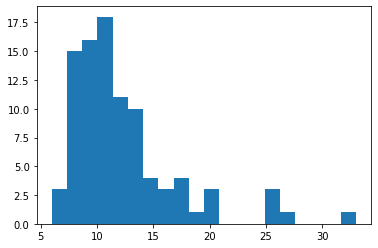

In [4]:
#look at the SNR distribution
plt.hist(gwtc['network_matched_filter_snr'],20)

(array([11., 12., 16., 29., 11.,  2.,  5.,  0.,  2.,  2.]),
 array([  1.46 ,  11.864,  22.268,  32.672,  43.076,  53.48 ,  63.884,
         74.288,  84.692,  95.096, 105.5  ]),
 <BarContainer object of 10 artists>)

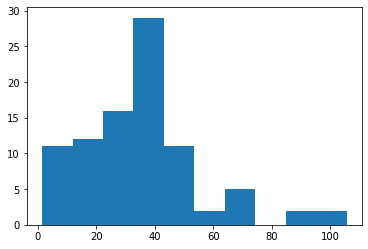

In [50]:
plt.hist(gwtc['mass_1_source'])

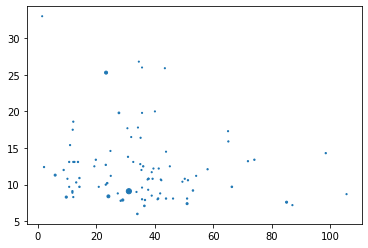

In [55]:
plt.scatter(gwtc['mass_1_source'],gwtc['network_matched_filter_snr'],s=gwtc['mass_1_source']/gwtc['mass_2_source'])

In [65]:
dat = (gwtc['mass_1_source'][np.isfinite(gwtc['mass_1_source'])])
np.median(dat), np.mean(dat)

(35.25, 35.05177777777778)

## Import $\Upsilon_{\rm obs}(\beta_{\rm min},\mu_{\rm min})$

In [5]:
#Load the data (computed in )
data_dict = np.load("../data/Ups_obs_mu_min.npy", allow_pickle=True).item()
betalims = data_dict["betalims"]
mu_min_arr = data_dict["mu_min_arr"]
ups_obs_arr = data_dict["ups_obs_arr"]

<ipython-input-6-8506243ae775>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


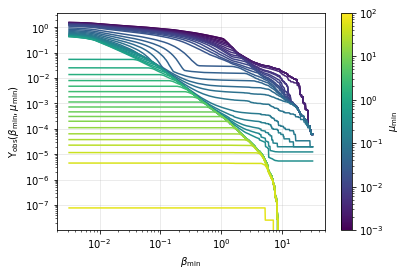

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

ups_obs_arr = np.array(ups_obs_arr)


fig, ax = plt.subplots()
lines = []

mu_min_norm = colors.LogNorm(vmin=min(mu_min_arr), vmax=max(mu_min_arr))
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mu_min_norm, cmap='viridis'), ax=ax)
cmap = plt.cm.get_cmap('viridis')

for i, mu_min in enumerate(mu_min_arr):
    line, = ax.loglog(betalims, ups_obs_arr[i, :], c=cmap(mu_min_norm(mu_min)))
    lines.append(line)

cbar.set_label(r'$\mu_{\rm min}$')



ax.set_ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min},\mu_{\rm min})$")
ax.set_xlabel(r"$\beta_{\rm min}$")

ax.grid(alpha=0.3)
plt.show()

fig.tight_layout()
# if tosave:
#     fig.savefig(join(fout, "ups_obs_magnif_many.pdf"), dpi=450)

<ipython-input-357-17c1f0810bb6>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


Text(0.5, 0, '$\\beta_{\\rm min}$')

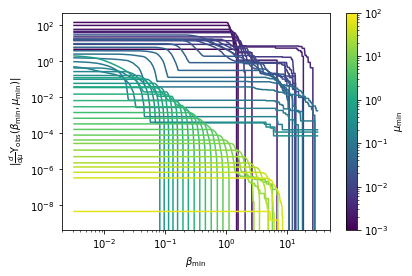

In [357]:
#fill an array
dups_obs_dmu = np.zeros_like(ups_obs_arr)

fig, ax = plt.subplots()
lines = []

mu_min_norm = colors.LogNorm(vmin=min(mu_min_arr), vmax=max(mu_min_arr))
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mu_min_norm, cmap='viridis'), ax=ax)
cmap = plt.cm.get_cmap('viridis')

for i in range(0,len(mu_min_arr)-1):
    tmp = (ups_obs_arr[i+1]-ups_obs_arr[i])/(mu_min_arr[i+1]-mu_min_arr[i])    
    dups_obs_dmu[i,:] = tmp
    
    mu_min = mu_min_arr[i]
    line, = ax.loglog(betalims, np.abs(tmp), c=cmap(mu_min_norm(mu_min)))
    lines.append(line)

cbar.set_label(r'$\mu_{\rm min}$')

ax.set_ylabel(r"$|\frac{d}{d\mu} \Upsilon_{\rm obs}(\beta_{\rm min},\mu_{\rm min})|$")
ax.set_xlabel(r"$\beta_{\rm min}$")

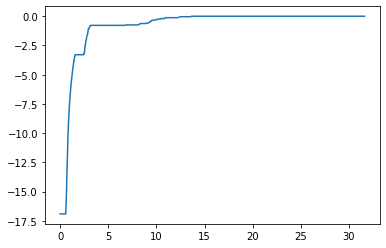

In [325]:
# plt.plot(betalims,dups_obs_dmu[10,:])

Generalizing the previous expression we have the following detection probability

$$p_i = f(M,r_{\rm src}) \int d\mu \mu^{3/2} \frac{d\Upsilon_{\rm Obs}}{d\mu}(\beta^i_{\rm ex}(M),r_{\rm src},\mu) = \frac{3}{2}f(M,r_{\rm src}) \int d\mu \mu^{1/2} \Upsilon_{\rm Obs}(\beta^i_{\rm ex}(M),r_{\rm src},\mu)$$

Notes:
* $\mu^{3/2}$ is a volume prior: very demagnified events are detectable, but they'd have to be very close to us (at observed SNR)
* the second expression follows by partial integration, so we can work with $\Upsilon_{\rm Obs}$
* we're allowing for arbitrary many loops (this can be reduced)
* we're considering the images individually

Going forward:
* figure out scaling with $r_{\rm src}$
* given $r_{\rm src},M$, interpolate on $\beta(M), r_{\rm src}$ for all the available $\mu$'s. Then do the magnification integral through array

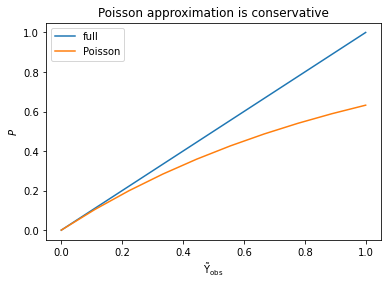

In [7]:
x = np.linspace(0,1,10)
plt.plot(x,x,label='full')
plt.plot(x,1-np.exp(-x),label='Poisson')
plt.title('Poisson approximation is conservative')
plt.xlabel(r'$\tilde \Upsilon_{\rm obs}$')
plt.ylabel(r'$P$')
plt.legend()

## Mismatch

We will use a simple criterion for detectability when $\mathcal{M}\cdot {\rm SNR}^2>1$ to estimate the number of detectable signals.

If we use our scaling as $\beta^2$ (for small $\beta$) then we can obtain the limit $\beta< \frac{\beta_0}{ \sqrt{\mathcal{M_0}} {\rm SNR}}$

In [8]:
from pycbc.filter.matchedfilter import match, sigmasq, optimized_match
from pycbc.filter import matched_filter
import pycbc as pycbc 
from astropy.cosmology import Planck18 as cosmo
import sys, os

from pycbc.waveform import get_fd_waveform

# sys.path.insert(0, os.path.abspath('../../glow/lensing_code/'))
# from mismatch_tools import mismatch

# sys.path.insert(0, os.path.abspath('../../diffinteg_gnfw/'))
# from fisher import waveform



In [9]:

def waveform(mass, z = 3, q=1, spin =0, inc = 1,
             t_obs = 10,n_sample=300,f_max_wrt_isco=1,
             detector_frame_mass=True):

    if detector_frame_mass: #then redshift to the actual mass
        mass = mass*(1+z)
    DL = cosmo.luminosity_distance(z).to('Mpc').value #it's given in Mpc but just in case


    fmin = f0_obs(mass,t_obs,eta=1/(1+q)**2) #NOTE: argument was t_obs/2.
    fmax = f_max_wrt_isco*f_isco(mass)
#     df = (fmax-fmin)/1000
    df = fmin*0.1


    #min freq is 10y before coallescence

    hp, hx = get_fd_waveform(approximant = 'IMRPhenomD',
                            mass1 = mass * q/(1. + q),
                            mass2 = mass * 1/(1. + q),
                            spin1z = spin,
                            spin2z = spin,
                            distance = DL,
                            inclination = inc,
                            long_asc_nodes = 0,
                            f_lower=fmin,
                            f_final = fmax,
                            delta_f = df)

    sample_freqs = hp.sample_frequencies
    # trim the nonzero values
    nonzeros = np.nonzero(hp)
    if len(nonzeros[0]) > 1:
        front = nonzeros[0][0]
        back = nonzeros[0][-1]
        freqs = np.logspace(np.log10(sample_freqs[front]),np.log10(sample_freqs[back]),n_sample)
    else:
        freqs = np.logspace(np.log10(sample_freqs[0]),np.log10(sample_freqs[-1]),n_sample)

    return freqs, hp,hx


def f_isco(M_tot): #TODO ADD, xi, cf eq 16 of https://arxiv.org/pdf/1608.01940.pdf
    '''GW frequency (2x orbital freq) of innermost stable circular orbit
       M_tot = total mass in solar masses
       f_isco in Hz
    '''

    return 2.*2198.8/M_tot
#     return 1./(6.*np.sqrt(6.)*np.pi*M_tot*2.95/3e5)

def f0_obs(M,t_obs,eta=0.25,units='y'):
    #TODO: add reference or explanation
    '''initial GW frequency for a given observation time
       solving from Maggiore's book eq. 16.26
       NOTE: not including the redshift factor
       ft_obs -> observation time
       M -> total mass, M_sun
       eta -> reduced mass ratio m1m2/(m1+m2)^2
       unit -> 'y' (default)
       result is in Hz
    '''

    if t_obs == np.infty:
        return 0
    if units=='s':
        t_obs=t_obs
    elif units=='y':
        t_obs =t_obs*3.154e+7
    else:
        print('units not understood')
    return 150.98/(eta*t_obs*M**(5/3.))**(3/8.)

def f0_obs_old(M,t_obs,eta=0.25):
    t_bar = 0.0205544 #in years, default

    return 1/M*(M*t_bar/t_obs/eta)**(3./8.)

def t_merge(M,f0,eta=0.25, unit = 'y'):
    '''time to for a binary to merge
       cf. Maggiore's book eq. 16.26
       NOTE: not including the redshift factor
       f0 -> initial frequency, Hz
       M -> total mass, M_sun (NOT CHIRP MASS!)
       eta -> reduced mass ratio m1m2/(m1+m2)^2
       unit -> 's' or 'y' (default)
       result is in years
    '''

    result = 3e5/eta*(1e5/M)**(5/3.)*(1e-3/f0)**(8/3.)
    if unit=='s':
        return result
    elif unit=='y':
        return result/3.154e7
    else:
        print('unit not cocded yet')

In [352]:
import pandas as pd
from scipy.interpolate import interp1d

psd_ligo_read=pd.read_csv("../../glow/lensing_code/notebooks/sensitivities/aplus.txt", sep=" ", header=None ,index_col=None)
psd_ligo_arr=np.transpose(psd_ligo_read.to_numpy(dtype=float))
psd2=interp1d(psd_ligo_arr[0],psd_ligo_arr[1],kind='linear', fill_value='extrapolate')

psd_et_read = pd.read_csv("../../glow/lensing_code/notebooks/sensitivities/et.txt", sep=" ", header=None ,index_col=None)
psd_et_arr=np.transpose(psd_et_read.to_numpy(dtype=float))
psd_et2=interp1d(psd_et_arr[0],psd_et_arr[1],kind='linear', fill_value='extrapolate')


def psd_ligo(f):
    '''Power spectral density from https://dcc.ligo.org/LIGO-T1500293/public'''
    return float(psd2(f)**2)

def psd_et(f):
    '''Power spectral density for ET'''
    return float(psd_et2(f)**2)

psd_ligo=np.vectorize(psd_ligo)
psd_et = np.vectorize(psd_et)


def mismatch_gshe(M_bbh, q=1,M_fid = 1e4,bt_fid = 1, zS_waveform=0.3,f_low=10, f_max_wrt_isco=10,n_sample=5,psd_fun = psd_ligo):
    '''compute the fiducial mismatch and SNR'''
    
    t_obs= 1/12/30/24/60/2
    
    fs, hx, hp = waveform(M_bbh, q=q, z=zS_waveform, t_obs=t_obs, f_max_wrt_isco=f_max_wrt_isco, n_sample=n_sample)

    fs = hx.sample_frequencies
    delta_f = fs[1]-fs[0]
    
    psd = pycbc.types.frequencyseries.FrequencySeries(psd_fun(fs), delta_f)
    snr0 = pycbc.filter.matched_filter(hp, hp, psd=psd, low_frequency_cutoff=f_low)
    
    f0_fid = bt_fid/(M_fid*1e-5) #in Hz

    F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
    F_gshe[F_gshe==np.nan]=1

    h_gshe = pycbc.types.frequencyseries.FrequencySeries(F_gshe*hx, delta_f)

    mismatch_fid = 1-optimized_match(hx, h_gshe, psd = psd,low_frequency_cutoff=f_low)[0]
    
    return [mismatch_fid, np.abs(snr0)[0]]

print(mismatch_gshe(10))

[0.14786896623603862, 7.586905708401893]
8.303685014673041


/home/miguel/.local/lib/python3.8/site-packages/pycbc/types/array.py:390: RuntimeWarning: divide by zero encountered in divide
  return self._data.__rtruediv__(other)
/home/miguel/.local/lib/python3.8/site-packages/pycbc/types/array.py:390: RuntimeWarning: invalid value encountered in divide
  return self._data.__rtruediv__(other)
/home/miguel/.local/lib/python3.8/site-packages/pycbc/types/array.py:217: RuntimeWarning: invalid value encountered in exp
  ret = getattr(ufunc, method)(*inputs, **kwargs)


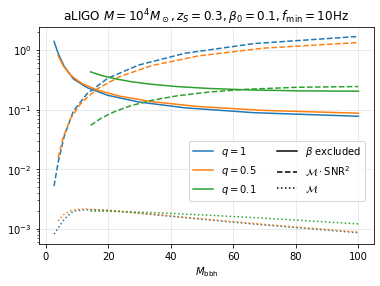

In [11]:
m_min = 1.3
bt_fid = 0.1
zS = 0.3
for i,q in enumerate([1,0.5,0.1]):
    Mbbh = np.geomspace(m_min*(1+1/q),100,10)
    dat = [mismatch_gshe(M,q=q,f_low=10,bt_fid=bt_fid,zS_waveform=zS,psd_fun=psd_ligo) for M in Mbbh]
    dat = np.array(dat)
    plt.semilogy(Mbbh,dat[:,0]*dat[:,1]**2,'--',c='C%i'%i)
    plt.plot(Mbbh,dat[:,0],':',c='C%i'%i)
    plt.plot(Mbbh,bt_fid/np.sqrt(dat[:,0])/dat[:,1],'-',label='$q=%g$'%q,c='C%i'%i)
    
plt.plot([],'k-',label=r'$\beta$ excluded')
plt.plot([],'k--',label=r'$\mathcal{M}\cdot{\rm SNR}^2$')
plt.plot([],'k:',label=r'$\mathcal{M}$')
    
plt.legend(ncol=2,loc=(0.45,0.2))
plt.xlabel(r"$M_{\rm bbh}$")
plt.title(r"aLIGO $M=10^4M_\odot, z_S=%g,\beta_0 =%g,f_{\rm min}=10$Hz"%(zS,bt_fid))
plt.grid(alpha=0.3)

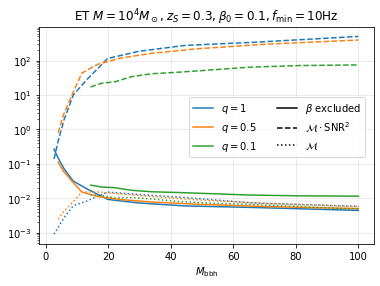

In [12]:
m_min = 1.3
bt_fid = 0.1
zS = 0.3
for i,q in enumerate([1,0.5,0.1]):
    Mbbh = np.geomspace(m_min*(1+1/q),100,10)
    dat = [mismatch_gshe(M,q=q,f_low=10,bt_fid=bt_fid,zS_waveform=zS,psd_fun=psd_et) for M in Mbbh]
    dat = np.array(dat)
    plt.semilogy(Mbbh,dat[:,0]*dat[:,1]**2,'--',c='C%i'%i)
    plt.plot(Mbbh,dat[:,0],':',c='C%i'%i)
    plt.plot(Mbbh,bt_fid/np.sqrt(dat[:,0])/dat[:,1],'-',label='$q=%g$'%q,c='C%i'%i)
    
plt.plot([],'k-',label=r'$\beta$ excluded')
plt.plot([],'k--',label=r'$\mathcal{M}\cdot{\rm SNR}^2$')
plt.plot([],'k:',label=r'$\mathcal{M}$')
    
plt.legend(ncol=2,loc=(0.45,0.4))
plt.xlabel(r"$M_{\rm bbh}$")
plt.title(r"ET $M=10^4M_\odot, z_S=%g,\beta_0 =%g,f_{\rm min}=10$Hz"%(zS,bt_fid))
plt.grid(alpha=0.3)

## Number of sources

Using https://github.com/hsinyuc/distancetool

Output--
Range (Mpc);
Redshift at which the detector can detect 50% of the uniformly distributed sources;
Redshift at which the detector can detect 10% of the uniformly distributed sources;
Redshift of the horizon;
Constant comoving time volume (Gpc^3);
Redshift within which 50% of the detected sources lie;
Redshift within which 90% of the detected sources lie;
Redshift within which 50% of the detected sources lie, the source distribution follows a star formation rate;
Redshift within which 90% of the detected sources lie, the source distribution follows a star formation rate;
Average redshift of the detected sources;
Average redshift of the detected sources, the source distribution follows a star formation rate.



The quantity is the comoving time volume. However, it is more convenient to include a function x(D) that accounts for the fraction of detected events at distance D

In [150]:
import sys
sys.path.insert(0,'/home/miguel/code/utils/distancetool/codes/')

import find_horizon_range_de as gwhor

from importlib import reload

reload(gwhor)

<module 'find_horizon_range_de' from '/home/miguel/code/utils/distancetool/codes/find_horizon_range_de.py'>

In [495]:
aligo_file = '/home/miguel/code/utils/distancetool/data/aLIGO/Advanced_LIGO_Design.txt'
CE1_file = '/home/miguel/code/utils/distancetool/data/CE1_strain.txt'
CE2_file = '/home/miguel/code/utils/distancetool/data/CE1_strain.txt'
out = gwhor.find_horizon_range(30,30,aligo_file,output_dict=True)


def psd_from_file(asdfile):

    input_freq,strain=np.loadtxt(asdfile,unpack=True,usecols=[0,1])
    print(min(input_freq))
    minimum_freq=np.maximum(min(input_freq),fmin)
    maximum_freq=np.minimum(max(input_freq),5000.)
    interpolate_psd = interp1d(input_freq, strain**2,kind='linear', fill_value='extrapolate')
    return interpolate_psd

CE_psd = psd_from_file(CE1_file)

9.0
SNR  8.007692584109703
1.2460666882137714
3.0


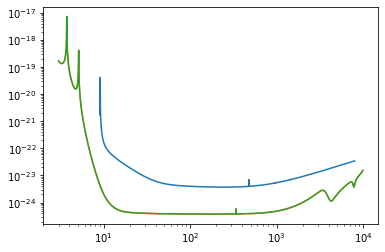

In [486]:
for f in [aligo_file,CE1_file,CE2_file]:
    d = np.genfromtxt(f)
    plt.loglog(d[:,0],d[:,1])

In [152]:
# gw_range,zresp50,zresp90,horz,vol_sumGpc3,z50,z90,sfr_z50,sfr_z90,z_mean,sfr_z_mean = out

# (3.*vol_sum/4./pi)**(1./3.),z_response50,z_response90,horizon_redshift,vol_sum/1E9,z50,z90,sfr_z50,sfr_z90,z_mean,sfr_z_mean 

out.keys()

dict_keys(['RangeMpc', 'z_response50', 'z_response90', 'horizon_redshift', 'vol_sumGpc3', 'z50', 'z90', 'sfr_z50', 'sfr_z90', 'z_mean', 'sfr_z_mean', 'z_array', 'compensate_det_frac_array', 'unit_volume_arrayMpc3'])

In [153]:
print(out['vol_sumGpc3'])

18.636980670134307


In [154]:
print(out['z_mean'])
print(out['vol_sumGpc3'])

0.4553826451034021
18.636980670134307


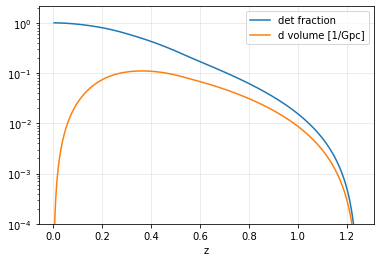

In [155]:
plt.plot(out['z_array'],out['compensate_det_frac_array'],label='det fraction')
plt.semilogy(out['z_array'],out['unit_volume_arrayMpc3']/1e9,label='d volume [1/Gpc]')
plt.grid(alpha=0.3)
plt.ylim(1e-4,)
plt.xlabel('z')
plt.legend()

In [156]:
from scipy.interpolate import griddata
from astropy import units as u
from astropy import constants as c
#relation between observed and real redshift

z_grid = np.geomspace(1e-3, 500,1000)
DLMpc_grid = (cosmo.luminosity_distance(z_grid)/u.Mpc).decompose()

def z_real_gw(z_obs,mu,cosmo=cosmo):
    '''
    real redshift for a GW observation
    z_obs: observed redshift
    mu: magnification
    '''
    DL_real = np.sqrt(mu)*cosmo.luminosity_distance(z_obs)/u.Mpc
    
    z_real = griddata(DLMpc_grid,z_grid, DL_real)
    return z_real
    
z_real_gw = np.vectorize(z_real_gw)    
z_real(3,10000)

array(195.06221717)

320151145893.61975 314.1592653589793


Text(0.5, 1.0, 'differential volume not matching! ')

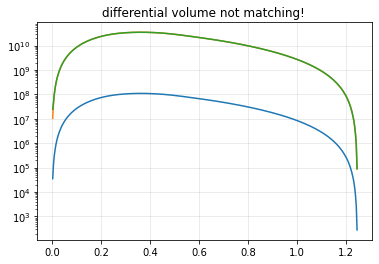

In [167]:
V = cosmo.comoving_volume(out['z_array'])/u.Mpc**3
dV = np.gradient(V,out['z_array'])

plt.semilogy(out['z_array'],out['unit_volume_arrayMpc3'],label='d volume')

volume_det = (4*np.pi*u.sr*cosmo.differential_comoving_volume(out['z_array'])/(1+out['z_array'])*out['compensate_det_frac_array']/u.Mpc**3).decompose()

plt.semilogy(out['z_array'],volume_det)
plt.semilogy(out['z_array'],dV/(1+out['z_array'])*out['compensate_det_frac_array'])
plt.grid(alpha=0.3)

print(np.average(volume_det/out['unit_volume_arrayMpc3']*1e9),100*np.pi)

plt.title('differential volume not matching! ')

Text(0.5, 1.0, 'but comoving volumes agree!')

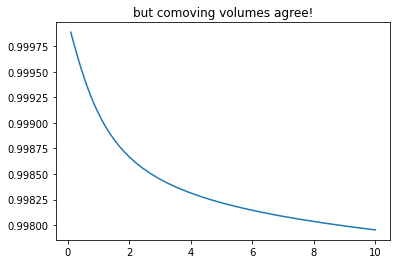

In [165]:
z = np.geomspace(0.1,10,50)

V1 = cosmo.comoving_volume(z)/u.Mpc
V2 = gwhor.de.comoving_volume_de(z,**gwhor.cosmo)

#plt.loglog(z,V1); plt.loglog(z,V2)

plt.plot(z,DL1/DL2)
plt.title('but comoving volumes agree!')


### Compute fraction of events at a given distance

$w = {\rm SNR}_{\rm opt}/{\rm SNR}_{\rm thr}$, probability of detection given by $P(w)$

In [344]:
#from Chen, Holz+
#sampled universal antenna power pattern for code sped up
w_sample,P_sample=np.genfromtxt(gwhor.base_dir+"/data/Pw_single.dat",unpack=True)
P_detect=interp1d(w_sample, P_sample,bounds_error=False,fill_value=0.0)
dP_sample = np.gradient(P_sample,w_sample)
dP_dx = interp1d(w_sample,dP_sample,bounds_error=False,fill_value=0.0)

def prob_detect(w):
    '''
    detection probability
    w = snr_th/snr_opt
    '''
    P = griddata(w_sample,P_sample,w)
    P[w>w_sample.max()] = 0
    P[w<w_sample.min()] = 1
    return P

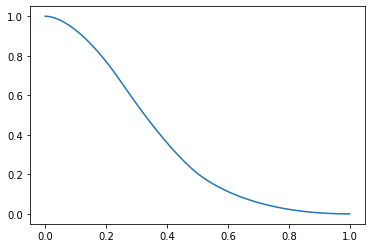

In [306]:
plt.plot(w_sample,P_sample)
# plt.plot(w_sample,dP_sample)

In [205]:
def guess_z_horizon(m1,m2, asdfile, snr_th = 8,fmin=10.,fref=10.,df=1.,maximum_freq = 1e3,approx = gwhor.ls.IMRPhenomD):
    
   
    input_freq,strain=np.loadtxt(asdfile,unpack=True,usecols=[0,1])
    print(min(input_freq))
    minimum_freq=np.maximum(min(input_freq),fmin)
    maximum_freq=np.minimum(max(input_freq),5000.)
    interpolate_psd = interp1d(input_freq, strain**2)
    
    #initial guess of horizon redshift and luminosity distance
    z0=1.0
    input_dist=gwhor.de.luminosity_distance_de(z0,**gwhor.cosmo)	
    hplus_tilda,hcross_tilda,freqs= gwhor.get_htildas((1.+z0)*m1,(1.+z0)*m2 ,input_dist,iota=0.,fmin=fmin,fref=fref,df=df,approx=approx)
    fsel=np.logical_and(freqs>minimum_freq,freqs<maximum_freq)
    psd_interp = interpolate_psd(freqs[fsel]) 	
    input_snr=gwhor.compute_horizonSNR(hplus_tilda,psd_interp,fsel,df)

    input_redshift=z0; guess_snr=0; njump=0
    #evaluate the horizon recursively
    while abs(guess_snr-snr_th)>snr_th*0.001 and njump<10: #require the error within 0.1%
        try:
            guess_redshift,guess_dist=gwhor.horizon_dist_eval(input_dist,input_snr,input_redshift) #horizon guess based on the old SNR		
            hplus_tilda,hcross_tilda,freqs= gwhor.get_htildas((1.+guess_redshift)*m1,(1.+guess_redshift)*m2 ,guess_dist,iota=0.,fmin=fmin,fref=fref,df=df,approx=approx)
        except:
            njump=10
            print("Will try interpolation.")		
        fsel=np.logical_and(freqs>minimum_freq,freqs<maximum_freq)
        psd_interp = interpolate_psd(freqs[fsel]) 		
        guess_snr=gwhor.compute_horizonSNR(hplus_tilda,psd_interp,fsel,df) #calculate the new SNR

        input_snr=guess_snr
        input_redshift=guess_redshift
        input_dist=guess_dist
        njump+=1
        #print(njump,guess_snr,guess_redshift)
    horizon_redshift=guess_redshift



	#at high redshift the recursive jumps lead to too big a jump for each step, and the recursive loop converge slowly.
    #so I interpolate the z-SNR curve directly.	
    if njump>=10:
        print("Recursive search for the horizon failed. Interpolation instead.")
        try:
            interp_z=linspace(0.001,120,1000); interp_snr=zeros(size(interp_z))
            for i in range(0,size(interp_z)): 
                hplus_tilda,hcross_tilda,freqs= gwhor.get_htildas((1.+interp_z[i])*m1,(1.+interp_z[i])*m2 ,gwhor.de.luminosity_distance_de(interp_z[i],**gwhor.cosmo),fmin=fmin,fref=fref,df=df,approx=approx)
                fsel=np.logical_and(freqs>minimum_freq,freqs<maximum_freq)
                psd_interp = interpolate_psd(freqs[fsel]) 	

                interp_snr[i]=gwhor.compute_horizonSNR(hplus_tilda,psd_interp,fsel,df)	
            interpolate_snr = interp1d(interp_snr[::-1],interp_z[::-1])
            horizon_redshift= interpolate_snr(snr_th)	
        except RuntimeError: #If the sources lie outside the given interpolating redshift the sources can not be observe, so I cut down the interpolation range.
            print("some of the SNR at the interpolated redshifts cannot be calculated.")
            interpolate_snr = interp1d(interp_snr[::-1],interp_z[::-1])
            horizon_redshift= interpolate_snr(snr_th)	
        except ValueError:	#horizon outside the interpolated redshifts. Can potentially modify the interpolation range, but we basically can not observe the type of source or the source has to be catastrophically close.
            print("Horizon further than z=120 or less than z=0.001")
            return	
    #horizon_redshift=30.
    hplus_tilda,hcross_tilda,freqs= gwhor.get_htildas((1.+horizon_redshift)*m1,(1.+horizon_redshift)*m2 ,gwhor.de.luminosity_distance_de(horizon_redshift,**gwhor.cosmo),fmin=fmin,fref=fref,df=df,approx=approx)
    fsel=np.logical_and(freqs>minimum_freq,freqs<maximum_freq)
    psd_interp = interpolate_psd(freqs[fsel]) 	

    print("SNR ",gwhor.compute_horizonSNR(hplus_tilda,psd_interp,fsel,df), ' at z=',horizon_redshift)
    return horizon_redshift     
    
guess_z_horizon(30,30,'/home/miguel/code/utils/distancetool/data/aLIGO/Advanced_LIGO_Design.txt')

9.0
SNR  8.007692584109703  at z= 1.2460666882137714


1.2460666882137714

In [206]:
m1 = 30
m2 = 30

snr_th = 8

fmin=10.
fref=10.
df=1.
maximum_freq = 1e3
approx = gwhor.ls.IMRPhenomD



n_zstep=400

asdfile = '/home/miguel/code/utils/distancetool/data/aLIGO/Advanced_LIGO_Design.txt'


z_hor = guess_z_horizon(m1,m2, asdfile, snr_th = 8,fmin=10.,fref=10.,df=1.,maximum_freq = 1e3,approx = gwhor.ls.IMRPhenomD)

input_freq,strain=np.loadtxt(asdfile,unpack=True,usecols=[0,1])
print(min(input_freq))
minimum_freq=np.maximum(min(input_freq),fmin)
maximum_freq=np.minimum(max(input_freq),5000.)
interpolate_psd = interp1d(input_freq, strain**2)


z,dz=np.linspace(z_hor,0,n_zstep,endpoint=False,retstep=True)
dz=abs(dz)
unit_volume=np.zeros(np.size(z)); compensate_detect_frac=np.zeros(np.size(z))
for i in range(0,np.size(z)):	
    hplus_tilda,hcross_tilda,freqs = gwhor.get_htildas((1.+z[i])*m1,(1.+z[i])*m2, gwhor.de.luminosity_distance_de(z[i],**gwhor.cosmo) ,fmin=fmin,fref=fref,df=df,approx=approx)
    fsel = np.logical_and(freqs>minimum_freq,freqs<maximum_freq)
    psd_interp = interpolate_psd(freqs[fsel])  
    optsnr_z= gwhor.compute_horizonSNR(hplus_tilda,psd_interp,fsel,df)
    w=snr_th/optsnr_z
    compensate_detect_frac[i]=P(w)		
    unit_volume[i]=(gwhor.de.comoving_volume_de(z[i]+dz/2.,**gwhor.cosmo)-gwhor.de.comoving_volume_de(z[i]-dz/2.,**gwhor.cosmo))/(1.+z[i])*P(w)

9.0
SNR  8.007692584109703  at z= 1.2460666882137714
9.0


In [279]:
def SNR_opt(z,M,asdfile,q=1,fmin=10.,fref=10.,df=1.,maximum_freq = 5e3,approx = gwhor.ls.IMRPhenomD):
    """
    optimal SNR(z)
    accounts for source's redshift
    NOTE: might have problems if redshift is too high
    """
    m1 = M*(1-q/2)
    m2 = m1/q
    snr_th = 8
    input_freq,strain=np.loadtxt(asdfile,unpack=True,usecols=[0,1])
    minimum_freq=np.maximum(min(input_freq),fmin)
    maximum_freq=np.minimum(max(input_freq),5000.)
    interpolate_psd = interp1d(input_freq, strain**2)
    optsnr_z = np.zeros_like(z)

    for i in range(0,np.size(z)):	
        hplus_tilda,hcross_tilda,freqs = gwhor.get_htildas((1.+z[i])*m1,(1.+z[i])*m2, gwhor.de.luminosity_distance_de(z[i],**gwhor.cosmo) ,fmin=fmin,fref=fref,df=df,approx=approx)
        fsel = np.logical_and(freqs>minimum_freq,freqs<maximum_freq)
        psd_interp = interpolate_psd(freqs[fsel])  
        optsnr_z[i]= gwhor.compute_horizonSNR(hplus_tilda,psd_interp,fsel,df)
    return optsnr_z
        
# SNR_opt = np.vectorize(SNR_opt)

In [280]:
z_array = np.geomspace(1e-2,50,50)
SNR_opt_array = SNR_opt(z_array,60,aligo_file,q=1)

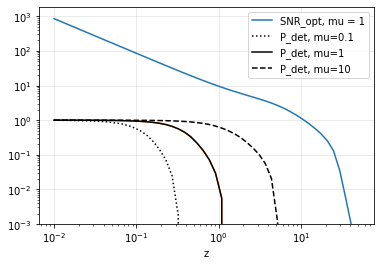

In [296]:
plt.loglog(z_array,SNR_opt_array,label='SNR_opt, mu = 1')
plt.loglog(z_array,P_detect(8/SNR_opt_array))

for mu,ls in zip([0.1,1,10],[':','-','--']):
    plt.loglog(z_array,P_detect(8/SNR_opt_array/np.sqrt(mu)),ls,c='k',label='P_det, mu=%g'%mu)

plt.ylim(1e-3,)
plt.grid(alpha=0.3)
plt.xlabel('z')
plt.legend()

## Number of detectable signals

$$ N = \int dz_s \frac{dV_z}{dz}(z_s)\mathcal{R}(z_s) \int d\mu P_{\rm det}\left(\frac{\rho_{\rm th}}{\sqrt{\mu}\rho_{\rm opt}(z_s)}\right) \frac{d P_{GSHE}}{d\mu}(\mu,\beta_{\rm min}(z_s,\mu))$$

with $\beta_{\rm min} = \frac{\beta_{0}}{\mathcal{M}_0}\frac{1}{\sqrt{\mu}\rho}$

We will compute $N/\mathcal{R}$, for $\mathcal{R}$ constant

In [496]:
#double integrals from https://stackoverflow.com/questions/20668689/integrating-2d-samples-on-a-rectangular-grid-using-scipy
from scipy.integrate import simps
import numpy as np
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 30)
z = np.cos(x[:,None])**4 + np.sin(y)**2
simps(simps(z, y), x)

0.8513409974325955

In [497]:
def beta_min(M_bbh, zS, q=1,M_fid = 1e4,bt_fid = 0.1,f_low=1, f_max_wrt_isco=10,n_sample=5,psd_fun = psd_ligo):
    '''convenient wrapper to compute the minimum beta, using the bt^2 dependence of the misamatch'''
    M,SNR0 = mismatch_gshe(M_bbh, q,M_fid ,bt_fid , zS,f_low, f_max_wrt_isco,n_sample,psd_fun)
    return bt_fid/np.sqrt(M)/SNR0

beta_min = np.vectorize(beta_min)
print(beta_min(60,10))

7.103336893478416


/home/miguel/.local/lib/python3.8/site-packages/pycbc/types/array.py:390: RuntimeWarning: divide by zero encountered in divide
  return self._data.__rtruediv__(other)
/home/miguel/.local/lib/python3.8/site-packages/pycbc/types/array.py:390: RuntimeWarning: invalid value encountered in divide
  return self._data.__rtruediv__(other)
/home/miguel/.local/lib/python3.8/site-packages/pycbc/types/array.py:217: RuntimeWarning: invalid value encountered in exp
  ret = getattr(ufunc, method)(*inputs, **kwargs)


In [498]:
def prob_GSHE_interp(bt,j_mu_min):
    '''
    interpolate dUps_obs/dmu
    bt: beta_min values
    j_mu_min: column for mu_min
    returns negative because mu_min is the lower limit in the cumulatime dsitibution
    '''
    P = griddata(betalims,dups_obs_dmu[j_mu_min,:],bt)
    P[bt<betalims.min()] = dups_obs_dmu[j_mu_min,0]
    P[bt>betalims.max()] = 0
    return -P

In [ ]:
def()

### A-LIGO

Result is in Gpc^3/y, need to multiply by R0!

Assumes M=1e4 M_sun, R_src = 5r_s, f = 1

In [530]:
#generate the quantities

M_tot = 60
snr_th = 8

psd_fun = psd_ligo; psd_file = aligo_file
# psd_fun = CE_psd; psd_file = CE1_file

mus = mu_min_arr
zs = np.geomspace(0.001,10,50)

btmin0 = beta_min(M_tot,zs,psd_fun=psd_fun)
snr_opt = SNR_opt(zs,M_tot,psd_file)
dVz = (cosmo.differential_comoving_volume(zs)/u.Gpc**3*4*np.pi*u.sr/(1+zs)).decompose()

In [531]:
#generate 2D quantities
p_det = prob_detect((snr_th/snr_opt)[:,None]/np.sqrt(mus))
btmin = btmin0[:,None]/np.sqrt(mus)

P_GSHE = np.array([prob_GSHE_interp(btmin[:,j],j) for j,mu in enumerate(mus)]).T
dVzdz = dVz[:,None]/mus**0

In [532]:
integrand = np.array(dVzdz*p_det*btmin*P_GSHE)
rate = simps(simps(dVzdz*p_det*btmin*P_GSHE, mus), zs)
R0=30
print(rate, rate*R0)

0.08359341696448398 2.5078025089345193


Text(0.5, 1.0, 'aLIGO')

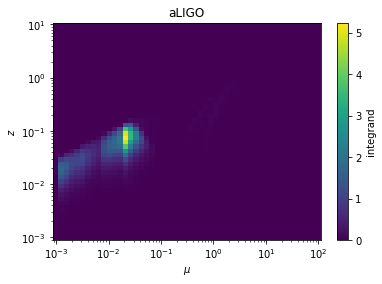

In [533]:
norm=colors.LogNorm(vmin=integrand.min(), vmax=integrand.max())

c = plt.pcolor(mus,zs,integrand)#,norm=norm)
plt.colorbar(c,label='integrand')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$z$')
plt.title('aLIGO')

In [504]:
for x in [p_det,btmin,P_GSHE,dVzdz]:
    print(len(x[:,0]),len(x[0,:]))

100 50
100 50
100 50
100 50


### CE

In [534]:
#generate the quantities

M_tot = 60
snr_th = 8

# psd_fun = psd_ligo; psd_file = aligo_file
psd_fun = CE_psd; psd_file = CE1_file

mus = mu_min_arr
zs = np.geomspace(0.001,10,50)

btmin0 = beta_min(M_tot,zs,psd_fun=psd_fun)
snr_opt = SNR_opt(zs,M_tot,psd_file)
dVz = (cosmo.differential_comoving_volume(zs)/u.Gpc**3*4*np.pi*u.sr/(1+zs)).decompose()

In [535]:
#generate 2D quantities
p_det = prob_detect((snr_th/snr_opt)[:,None]/np.sqrt(mus))
btmin = btmin0[:,None]/np.sqrt(mus)

P_GSHE = np.array([prob_GSHE_interp(btmin[:,j],j) for j,mu in enumerate(mus)]).T
dVzdz = dVz[:,None]/mus**0

In [536]:
integrand = np.array(dVzdz*p_det*btmin*P_GSHE)
rate = simps(simps(dVzdz*p_det*btmin*P_GSHE, mus), zs)
R0=30
print(rate, rate*R0)

13.289240476879868 398.6772143063961


Text(0.5, 1.0, 'Cosmic Explorer')

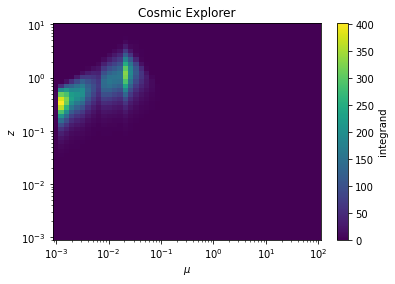

In [537]:
norm=colors.LogNorm(vmin=integrand.min(), vmax=integrand.max())

c = plt.pcolor(mus,zs,integrand)#,norm=norm)
plt.colorbar(c,label='integrand')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$z$')
plt.title('Cosmic Explorer')